In [42]:
import pandas as pd
import numpy as np

test = pd.read_csv('tests.txt', sep = '\|', engine = 'python')
species = pd.read_csv('species.txt', sep = '\|', engine = 'python')

# No embrions in the test
test_no_EM = test[test.organism_lifestage != "EM"]
# No Fish
species = species[~species.ecotox_group.isnull()]
species_fish = species[species.ecotox_group.str.contains("Fish")]

# Merge
test_fish_only = test.merge(species_fish, on="species_number")
test_fish_only

,test_id,reference_number,test_cas,test_grade,test_grade_comments,test_formulation,test_formulation_comments,test_radiolabel,test_radiolabel_comments,test_purity_mean_op,...,subphylum_div,superclass,class,tax_order,family,genus,species,subspecies,variety,ecotox_group
0,564803,54130,314409,NR,NaN,WP,NaN,NR,NaN,NaN,...,Vertebrata,Osteichthyes,Actinopterygii,Perciformes,Centrarchidae,Lepomis,macrochirus,NaN,NaN,"Fish,Standard Test Species"
1,1000215,49,56235,NR,NaN,NR,NaN,NR,NaN,NaN,...,Vertebrata,Osteichthyes,Actinopterygii,Perciformes,Centrarchidae,Lepomis,macrochirus,NaN,NaN,"Fish,Standard Test Species"
2,1000216,49,56235,NR,NaN,NR,NaN,NR,NaN,NaN,...,Vertebrata,Osteichthyes,Actinopterygii,Perciformes,Centrarchidae,Lepomis,macrochirus,NaN,NaN,"Fish,Standard Test Species"
3,1000289,73,121755,NR,NaN,NR,NaN,NR,NaN,NaN,...,Vertebrata,Osteichthyes,Actinopterygii,Perciformes,Centrarchidae,Lepomis,macrochirus,NaN,NaN,"Fish,Standard Test Species"
4,1000290,73,121755,NR,NaN,NR,NaN,NR,NaN,NaN,...,Vertebrata,Osteichthyes,Actinopterygii,Perciformes,Centrarchidae,Lepomis,macrochirus,NaN,NaN,"Fish,Standard Test Species"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162362,2230875,165995,25655418,NR,NaN,NR,NaN,NR,NaN,NaN,...,Vertebrata,Osteichthyes,Actinopterygii,Perciformes,Sciaenidae,Atractoscion,nobilis,NaN,NaN,Fish
162363,2230884,165995,25655418,NR,NaN,NR,NaN,NR,NaN,NaN,...,Vertebrata,Osteichthyes,Actinopterygii,Perciformes,Sciaenidae,Atractoscion,nobilis,NaN,NaN,Fish
162364,2233955,103575,50000,R,NaN,NR,NaN,NR,NaN,NaN,...,Vertebrata,Osteichthyes,Actinopterygii,Perciformes,Lutjanidae,Lutjanus,guttatus,NaN,NaN,Fish
162365,2233956,103575,118219980,NR,NaN,NR,NaN,NR,NaN,NaN,...,Vertebrata,Osteichthyes,Actinopterygii,Perciformes,Lutjanidae,Lutjanus,guttatus,NaN,NaN,Fish


Il dataset **test_fish_only** contiene tutte le informazioni per i test e le relative specie di pesci.

In [212]:
columns = ['class', 'tax_order','family','genus', 'species']

fish_tested = test_fish_only[columns]
fish_tested

,class,tax_order,family,genus,species
0,Actinopterygii,Perciformes,Centrarchidae,Lepomis,macrochirus
1,Actinopterygii,Perciformes,Centrarchidae,Lepomis,macrochirus
2,Actinopterygii,Perciformes,Centrarchidae,Lepomis,macrochirus
3,Actinopterygii,Perciformes,Centrarchidae,Lepomis,macrochirus
4,Actinopterygii,Perciformes,Centrarchidae,Lepomis,macrochirus
...,...,...,...,...,...
162362,Actinopterygii,Perciformes,Sciaenidae,Atractoscion,nobilis
162363,Actinopterygii,Perciformes,Sciaenidae,Atractoscion,nobilis
162364,Actinopterygii,Perciformes,Lutjanidae,Lutjanus,guttatus
162365,Actinopterygii,Perciformes,Lutjanidae,Lutjanus,guttatus


In [47]:
fish_tested = fish_tested.drop_duplicates()
fish_tested

,class,tax_order,family,genus,species
0,Actinopterygii,Perciformes,Centrarchidae,Lepomis,macrochirus
10074,Actinopterygii,Salmoniformes,Salmonidae,Oncorhynchus,mykiss
38370,Actinopterygii,Cypriniformes,Cyprinidae,NaN,NaN
38757,NaN,NaN,NaN,NaN,NaN
39090,Actinopterygii,Cypriniformes,Cyprinidae,Cyprinus,carpio
...,...,...,...,...,...
162352,Actinopterygii,Cypriniformes,Cyprinidae,Blicca,bjoerkna
162354,Actinopterygii,Perciformes,Odontobutidae,Perccottus,glenii
162356,Actinopterygii,Mugiliformes,Mugilidae,Mugil,liza
162360,Actinopterygii,Perciformes,Sciaenidae,Atractoscion,nobilis


In [49]:
fish_tested = fish_tested.dropna()
fish_tested

,class,tax_order,family,genus,species
0,Actinopterygii,Perciformes,Centrarchidae,Lepomis,macrochirus
10074,Actinopterygii,Salmoniformes,Salmonidae,Oncorhynchus,mykiss
39090,Actinopterygii,Cypriniformes,Cyprinidae,Cyprinus,carpio
47057,Actinopterygii,Siluriformes,Ictaluridae,Ameiurus,melas
47382,Actinopterygii,Beloniformes,Adrianichthyidae,Oryzias,latipes
...,...,...,...,...,...
162352,Actinopterygii,Cypriniformes,Cyprinidae,Blicca,bjoerkna
162354,Actinopterygii,Perciformes,Odontobutidae,Perccottus,glenii
162356,Actinopterygii,Mugiliformes,Mugilidae,Mugil,liza
162360,Actinopterygii,Perciformes,Sciaenidae,Atractoscion,nobilis


Nel dataset **fish_tested** ci sono tutti i pesci che sono stati utilizzati per i test

In [50]:
fish_tested.to_csv('dataset_prova/fish_tested.csv', index = False)

# Verificare se i pesci costituiscono un albero filgenetico, se possibile disegnarlo.

In [1]:
import pandas as pd
import numpy as np

ft = pd.read_csv('dataset_prova/fish_tested.csv').drop(columns = 'Unnamed: 0')
ft

,class,tax_order,family,genus,species
0,Actinopterygii,Perciformes,Centrarchidae,Lepomis,macrochirus
1,Actinopterygii,Salmoniformes,Salmonidae,Oncorhynchus,mykiss
2,Actinopterygii,Cypriniformes,Cyprinidae,Cyprinus,carpio
3,Actinopterygii,Siluriformes,Ictaluridae,Ameiurus,melas
4,Actinopterygii,Beloniformes,Adrianichthyidae,Oryzias,latipes
...,...,...,...,...,...
896,Actinopterygii,Cypriniformes,Cyprinidae,Blicca,bjoerkna
897,Actinopterygii,Perciformes,Odontobutidae,Perccottus,glenii
898,Actinopterygii,Mugiliformes,Mugilidae,Mugil,liza
899,Actinopterygii,Perciformes,Sciaenidae,Atractoscion,nobilis


Costruiamo l'albero:

> si deve utilizzare il pacchetto NetworkX

In [35]:
class_ = ft['class'].unique()
tax_order = ft['tax_order'].unique()
family = ft['family'].unique()
genus = ft['genus'].unique()
species = ft['species'].unique()

In [36]:
c_to = dict()
to_fam = dict()
fam_gen = dict()
gen_spec = dict()

for c in class_:
    c_to[c] = list()

for to in tax_order:
    to_fam[to] = list()
    
for f in family:
    fam_gen[f] = list()
    
for g in genus:
    gen_spec[g] = list()

In [37]:
for i in ft.values:
    if i[1] not in c_to[i[0]]:
        c_to[i[0]].append(i[1])
    
    if i[2] not in to_fam[i[1]]:
        to_fam[i[1]].append(i[2])
    
    if i[3] not in fam_gen[i[2]]:
        fam_gen[i[2]].append(i[3])
    
    if i[4] not in gen_spec[i[3]]:
        gen_spec[i[3]].append(i[4])

In [189]:
albero = c_to.copy()
albero.update(to_fam)
albero.update(fam_gen)
# albero.update(gen_spec)
# in albero ci sta tutto l'albero fino al genere
# albero

In [190]:
import networkx as nx

alnx = nx.Graph(albero)

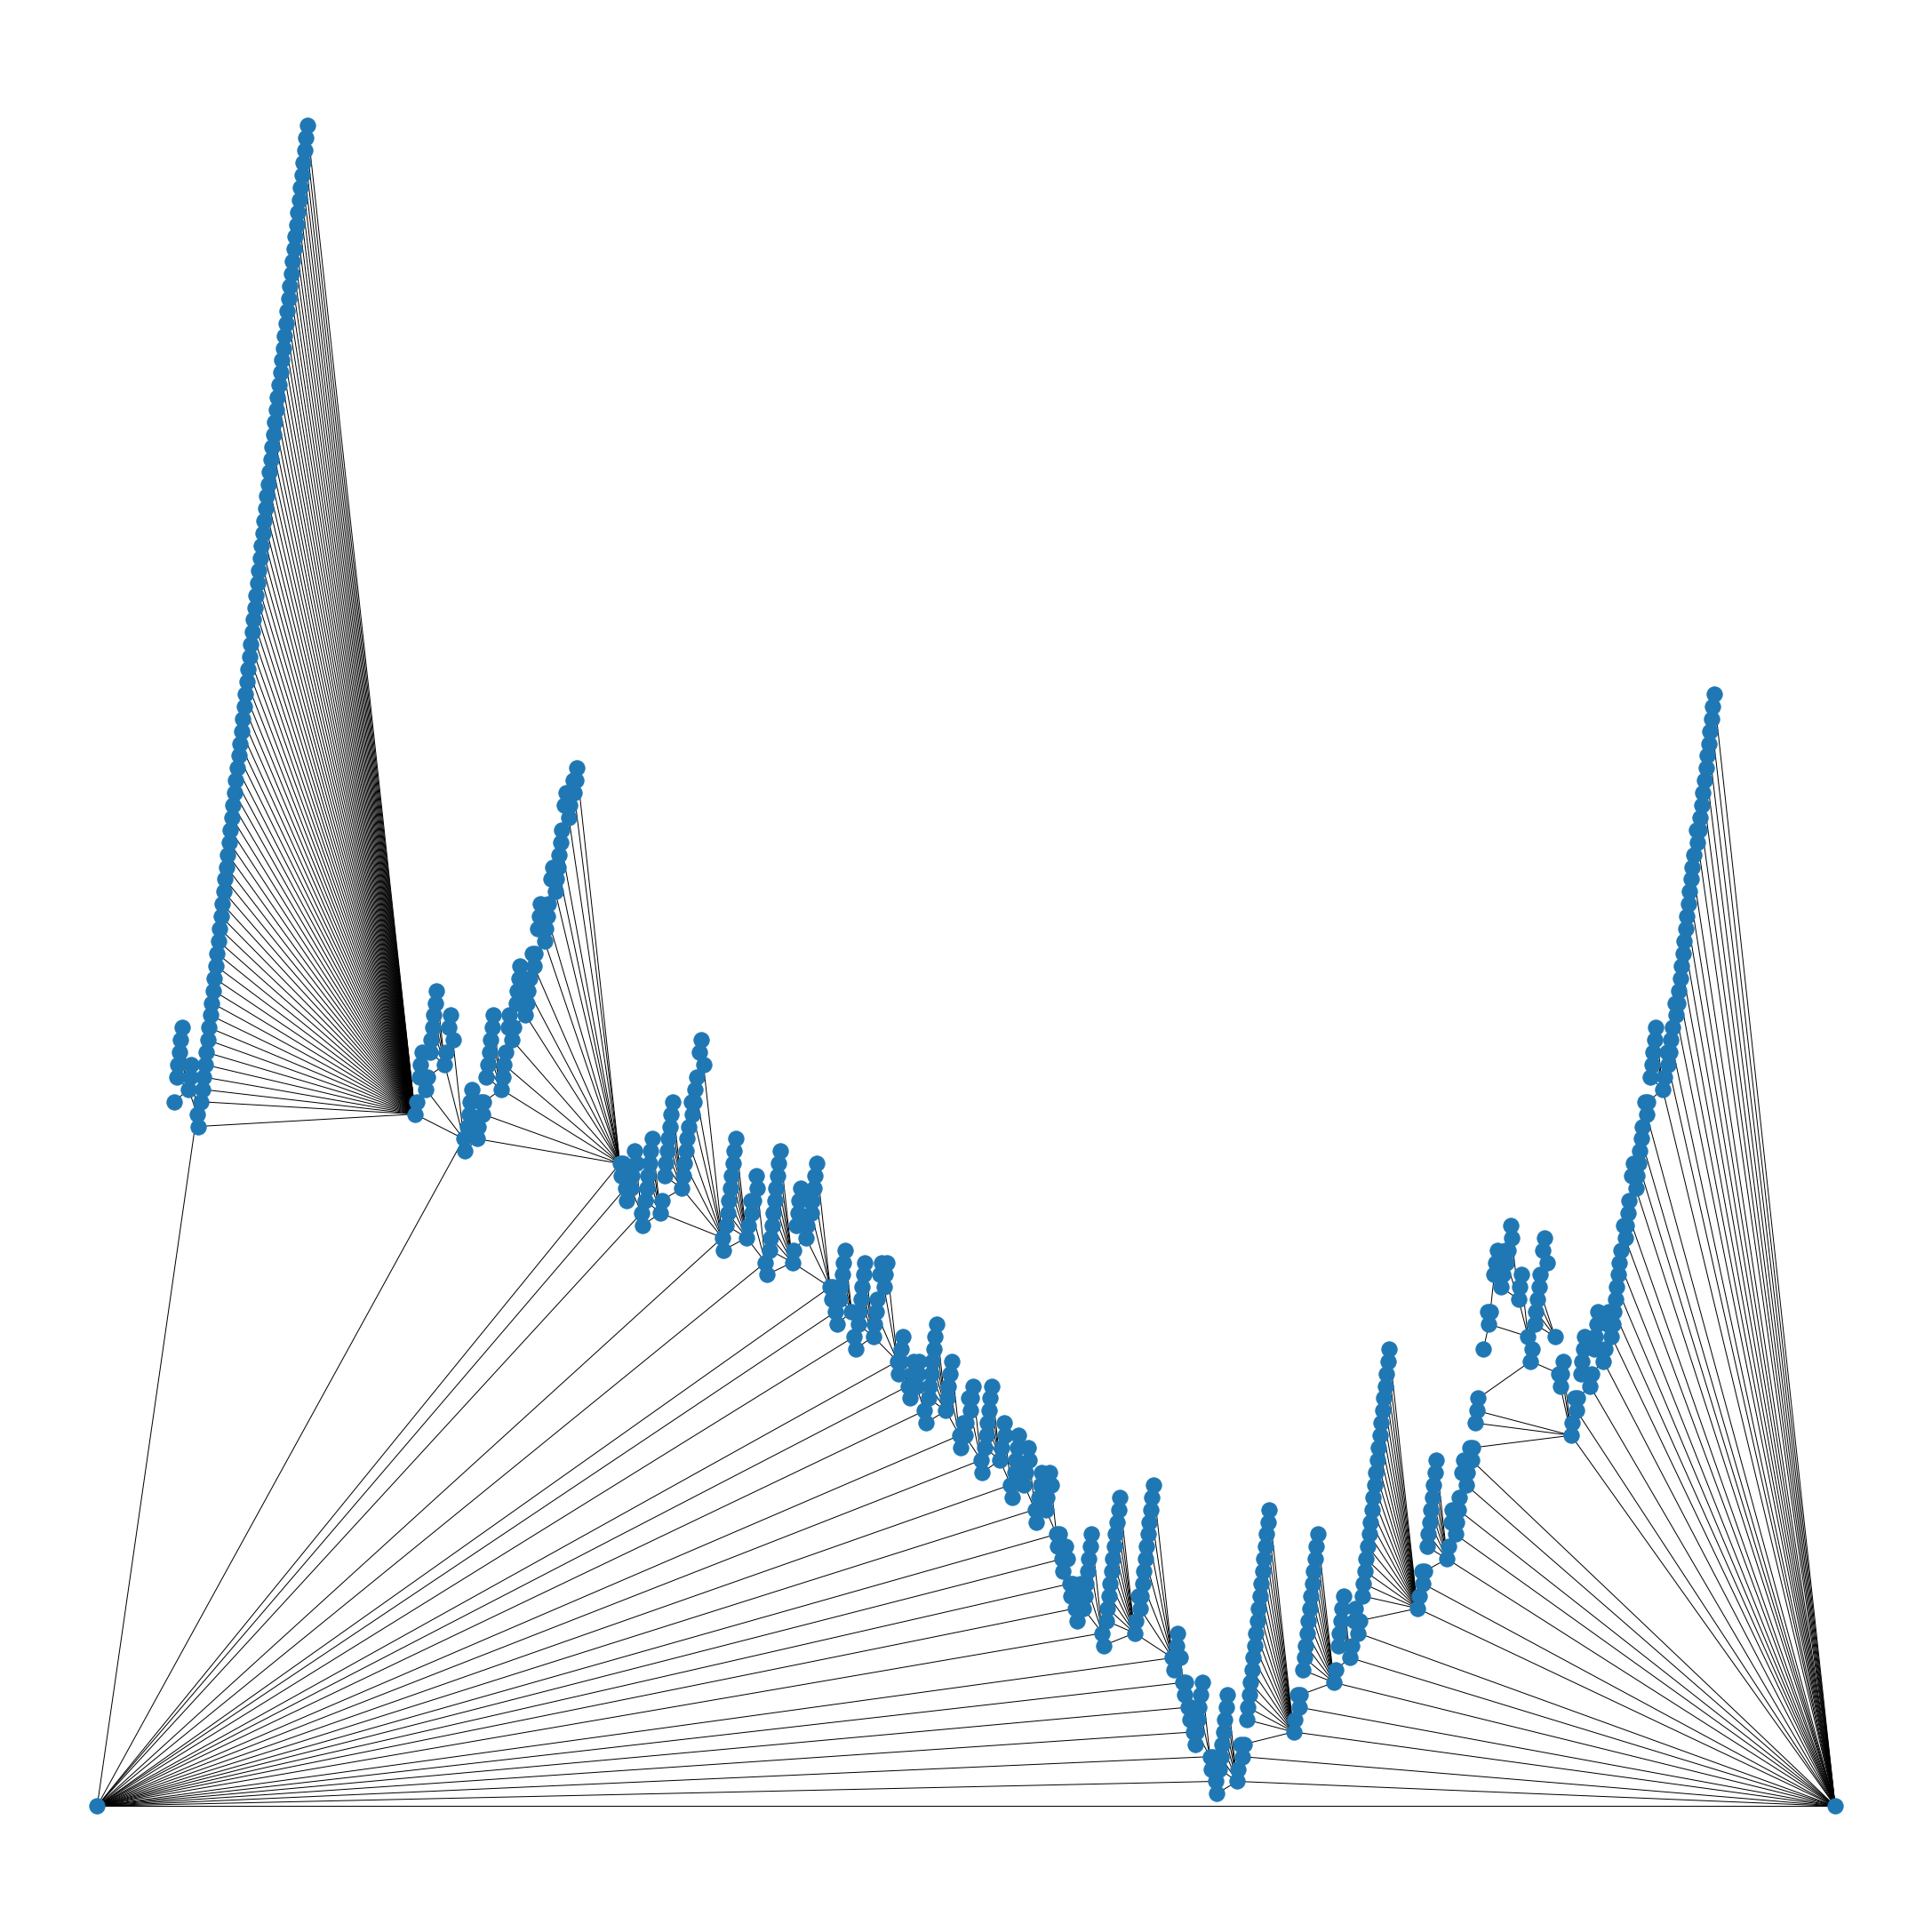

In [191]:
import matplotlib.pyplot as plt

plt.figure(figsize=(30, 30))
nx.draw(alnx, pos = nx.planar_layout(alnx))

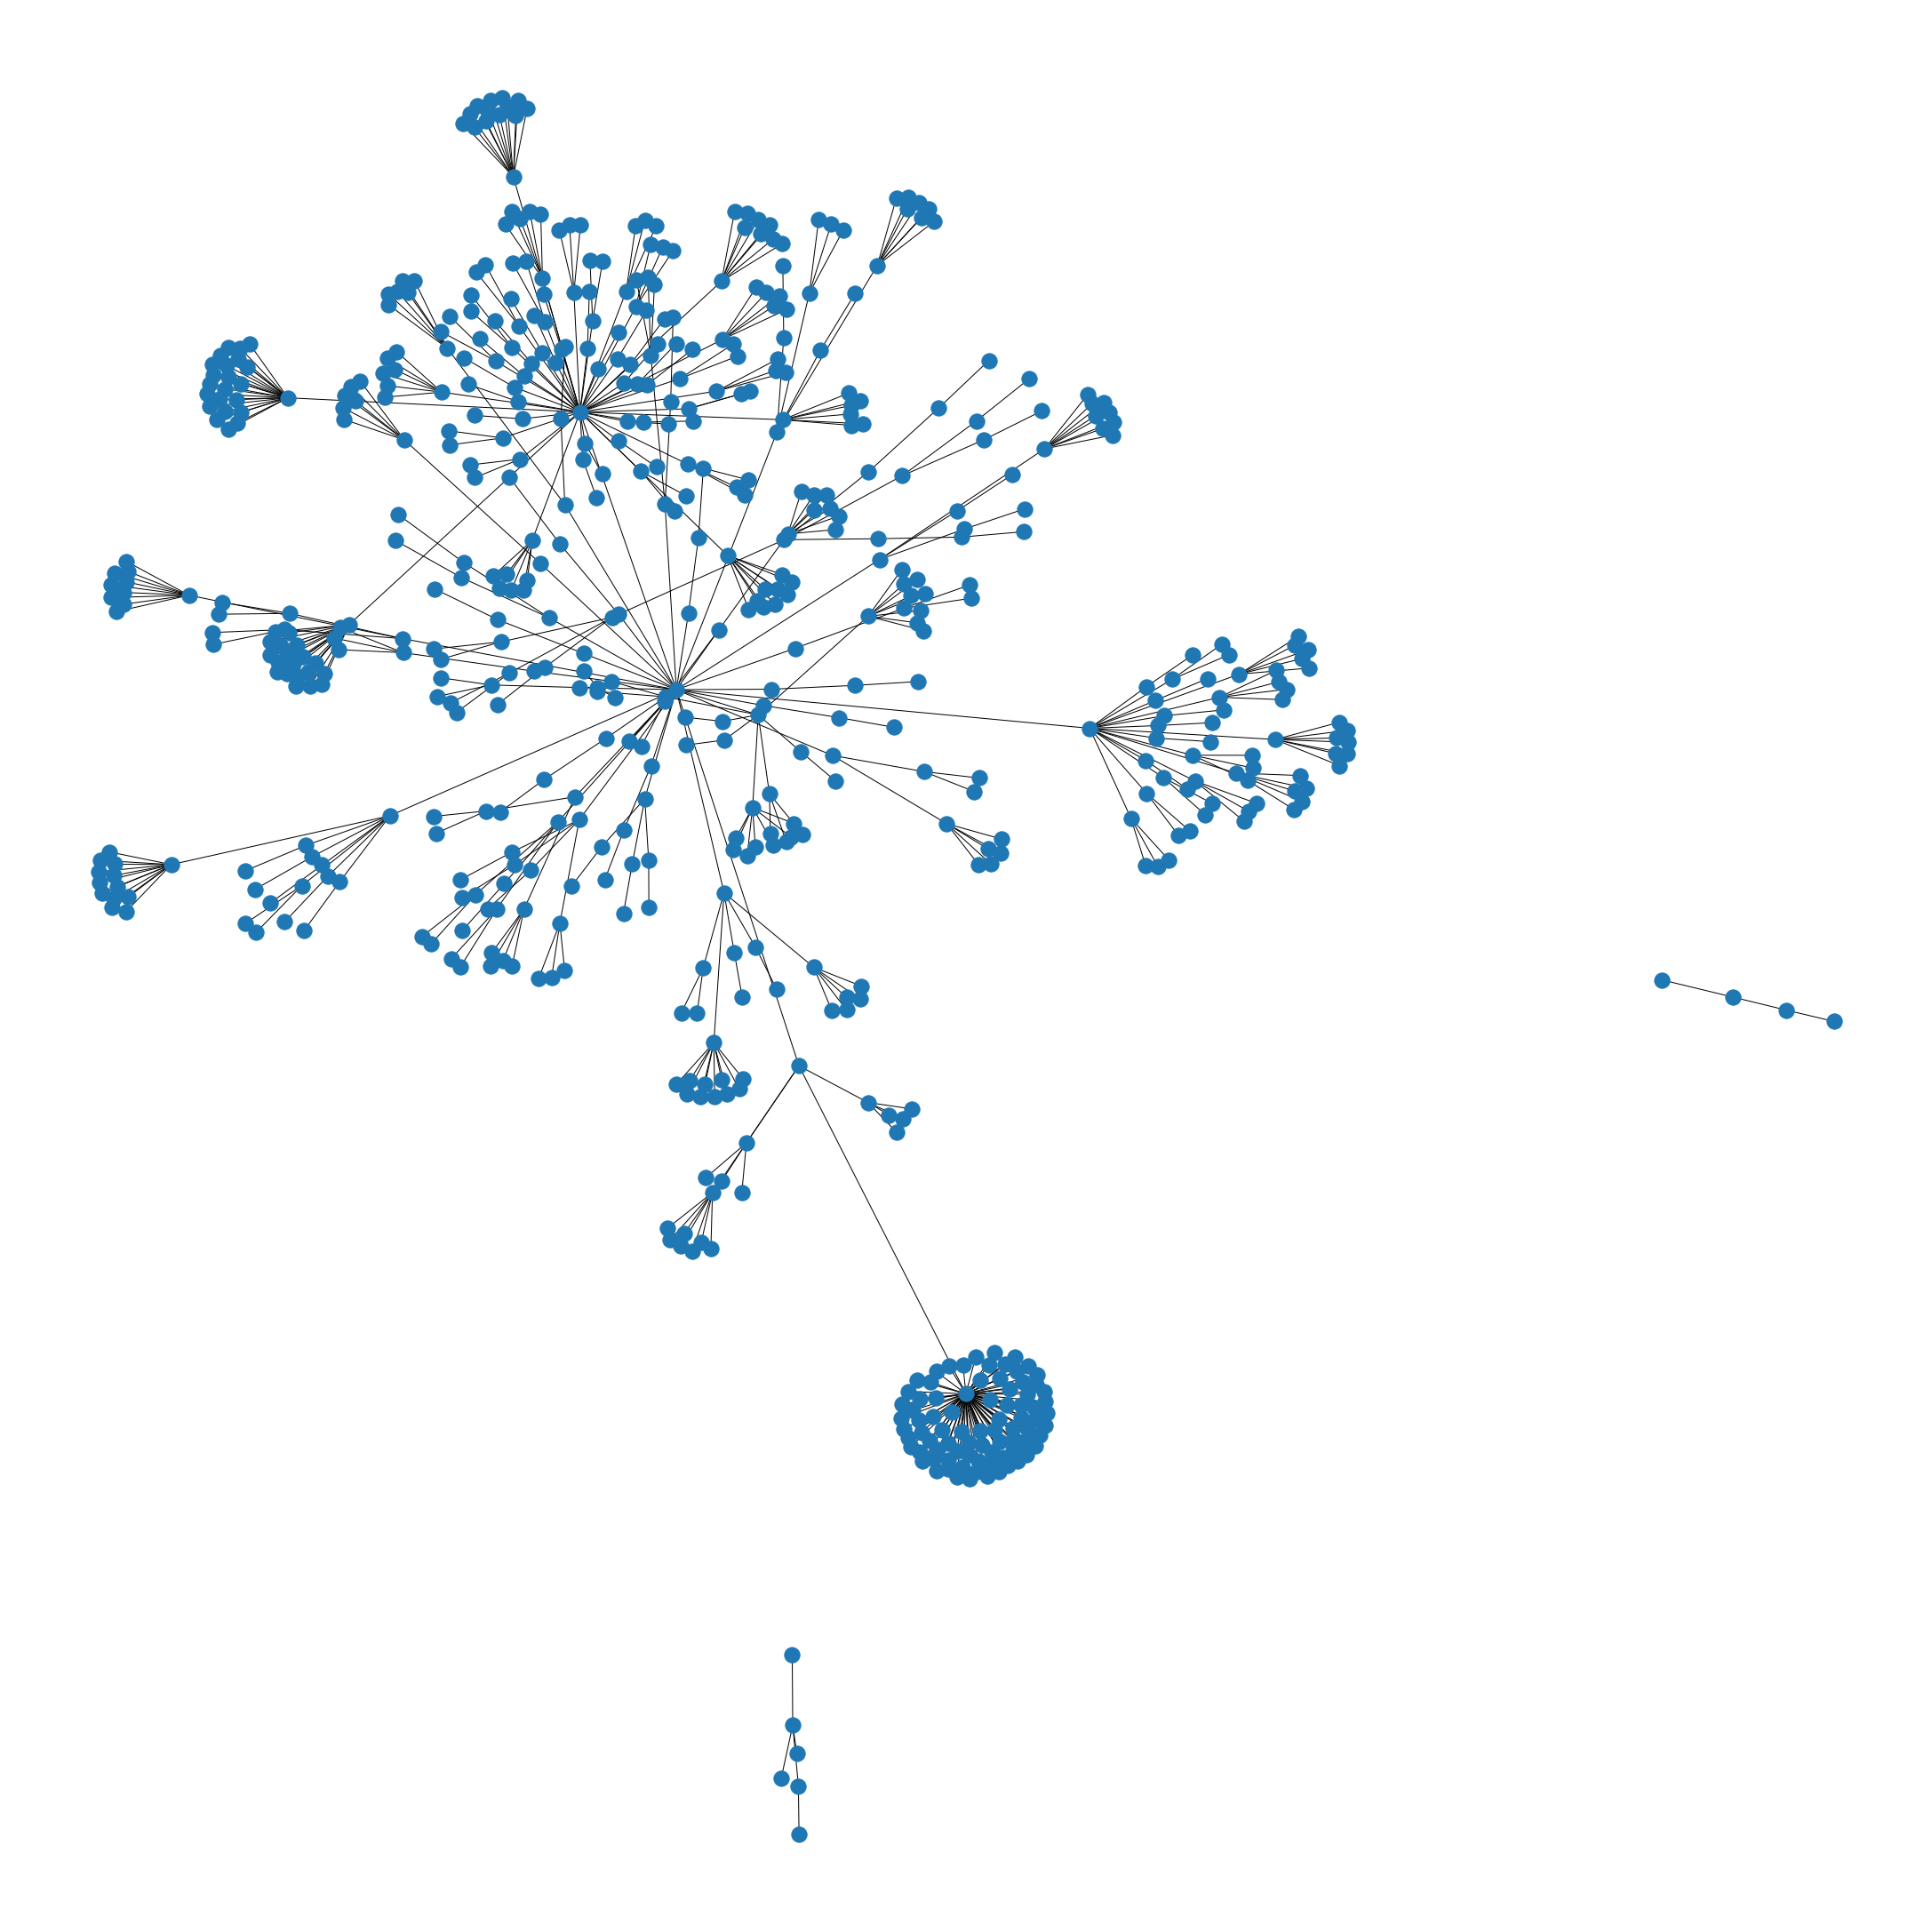

In [194]:
plt.figure(figsize=(30,30))
nx.draw(alnx, pos = nx.spring_layout(alnx))

Questi due grafi non considerano le specie.

Non riesco a plottarli in una forma ad albero, comunque si vede che: a partire da certi nodi questi si ramificano fino alle specie, altri invece condividono anche la stessa specie pur partendo da due classi diverse... ci sono alcuni cicli che però vanno analizzati meglio.

Forse utilizzando DendroPy...

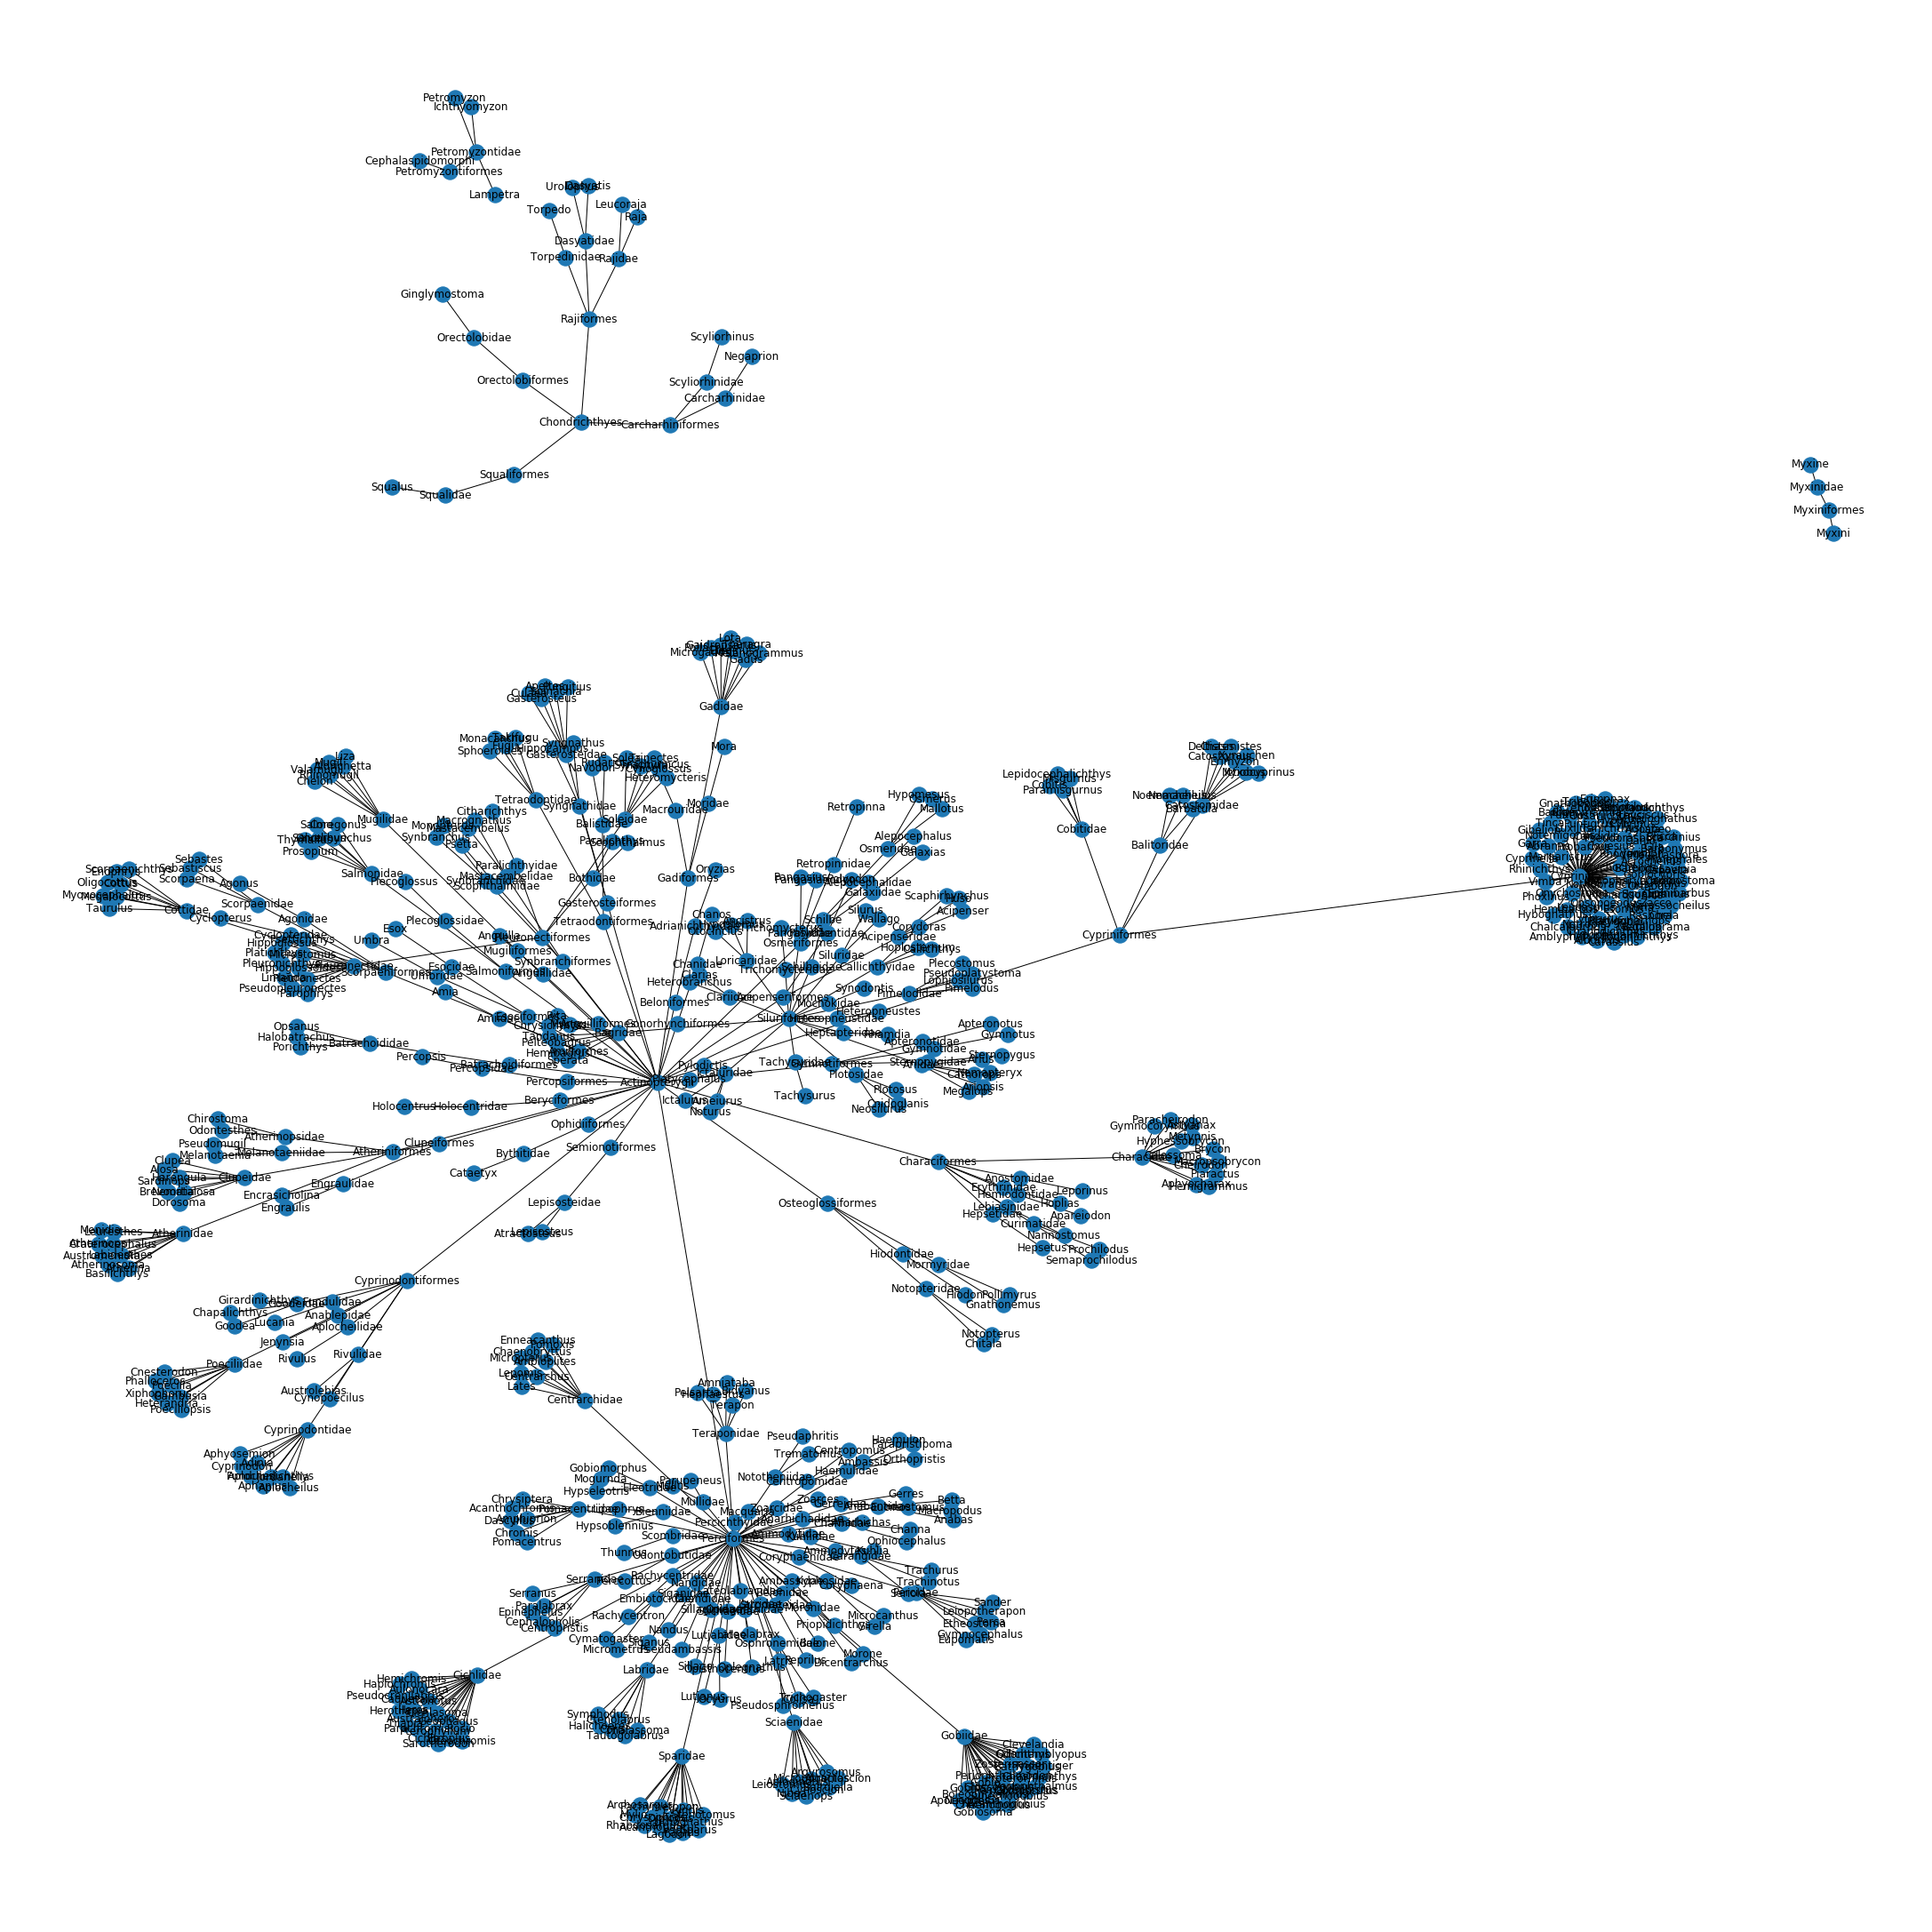

In [204]:
plt.figure(figsize=(30,30))
nx.draw(alnx, pos= nx.spring_layout(alnx), node_list= class_, with_labels = True)

# altro

In [206]:
import pandas as pd
import numpy as np

ft = pd.read_csv('dataset_prova/fish_tested.csv').drop(columns = 'Unnamed: 0')
ft

,class,tax_order,family,genus,species
0,Actinopterygii,Perciformes,Centrarchidae,Lepomis,macrochirus
1,Actinopterygii,Salmoniformes,Salmonidae,Oncorhynchus,mykiss
2,Actinopterygii,Cypriniformes,Cyprinidae,Cyprinus,carpio
3,Actinopterygii,Siluriformes,Ictaluridae,Ameiurus,melas
4,Actinopterygii,Beloniformes,Adrianichthyidae,Oryzias,latipes
...,...,...,...,...,...
896,Actinopterygii,Cypriniformes,Cyprinidae,Blicca,bjoerkna
897,Actinopterygii,Perciformes,Odontobutidae,Perccottus,glenii
898,Actinopterygii,Mugiliformes,Mugilidae,Mugil,liza
899,Actinopterygii,Perciformes,Sciaenidae,Atractoscion,nobilis


In [210]:
print('Le classi sono: {}'.format(len(ft['class'].unique())))
print('Gli ordini tassonomici sono: {}'.format(len(ft['tax_order'].unique())))
print('Le famiglie sono: {}'.format(len(ft['family'].unique())))
print('I generi sono: {}'.format(len(ft['genus'].unique())))
print('Le specie sono: {}'.format(len(ft['species'].unique())))

Le classi sono: 4
Gli ordini tassonomici sono: 35
Le famiglie sono: 137
I generi sono: 471
Le specie sono: 747


In [215]:
class_ = ft['class'].unique()
tax_order = ft['tax_order'].unique()

c_to = dict()

for c in class_:
    c_to[c] = list()

for i in ft.values:
    if i[1] not in c_to[i[0]]:
        c_to[i[0]].append(i[1])

c_to.keys()

dict_keys(['Actinopterygii', 'Chondrichthyes', 'Cephalaspidomorphi', 'Myxini'])

# Verifica che le specie costituiscano un albero filogenetico

In [247]:
def checkTree(dataset):
    '''
    Vogliamo vedere se nel dataset delle specie di animali su cui sono stati effettuati i test è presente un albero 
    filogenetico, ossia se le specie di pesci condividono il genere allora condividono anche la famiglia, 
    se condividono la famiglia allora condividono anche l'ordine tassonomico così via fino alla classe.
    '''
    lst_fam =list()
    lst_to = list() 
    lst_c = list()  # le verifiche incrociate
    
    for r1 in ft.values:
        for r2 in ft.values:
            if r1[3] == r2[3]:
                lst_fam.append(r1[2] == r2[2])
            if r1[2] == r2[2]:
                lst_to.append(r1[1] == r2[1])
            if r1[1] == r2[1]:
                lst_c.append(r1[0] == r2[0])
    
    lst_fam = pd.Series(lst_fam)
    lst_to = pd.Series(lst_to)
    lst_c = pd.Series(lst_c)
    
    if (sum(lst_fam == False) == 0) & (sum(lst_to == False) == 0) & (sum(lst_c == False) == 0):
        print('Tutto ok, è un albero')
    else:
        print('Ops... non è un albero')

checkTree(ft)

Tutto ok, è un albero


## Controllo che nel dataset final_db_prcessed ci siano gli stessi animali

In [248]:
db = pd.read_csv('dataset/final_db_processed.csv')
db

,test_cas,species,conc1_type,exposure_type,obs_duration_mean,conc1_mean,atom_number,alone_atom_number,bonds_number,doubleBond,tripleBond,ring_number,Mol,MorganDensity,LogP,class,tax_order,family,genus
0,100-00-5,rerio,F,F,48.0,15.00,0.317908,2,0.488106,1,0,1.0,0.535725,1.300000,2.2482,Actinopterygii,Cypriniformes,Cyprinidae,Danio
1,100-00-5,rerio,F,F,96.0,15.00,0.317908,2,0.488106,1,0,1.0,0.535725,1.300000,2.2482,Actinopterygii,Cypriniformes,Cyprinidae,Danio
2,100-01-6,rerio,F,S,96.0,87.60,0.317908,2,0.488106,1,0,1.0,0.510371,1.300000,1.1770,Actinopterygii,Cypriniformes,Cyprinidae,Danio
3,100-02-7,rerio,F,AQUA,48.0,26.50,0.317908,2,0.488106,1,0,1.0,0.511738,1.300000,1.3004,Actinopterygii,Cypriniformes,Cyprinidae,Danio
4,100-44-7,rerio,F,S,96.0,4.00,0.217006,0,0.447258,0,0,1.0,0.493578,1.125000,2.4254,Actinopterygii,Cypriniformes,Cyprinidae,Danio
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23327,94-75-7,boga,F,R,96.0,3.80,0.410746,0,0.537196,1,0,1.0,0.601033,1.461538,2.4568,Actinopterygii,Cypriniformes,Cyprinidae,Labeo
23328,94-75-7,neilgherriensis,F,R,24.0,7.80,0.410746,0,0.537196,1,0,1.0,0.601033,1.461538,2.4568,Actinopterygii,Cypriniformes,Cyprinidae,Rasbora
23329,94-75-7,neilgherriensis,F,R,48.0,6.80,0.410746,0,0.537196,1,0,1.0,0.601033,1.461538,2.4568,Actinopterygii,Cypriniformes,Cyprinidae,Rasbora
23330,94-75-7,neilgherriensis,F,R,96.0,5.60,0.410746,0,0.537196,1,0,1.0,0.601033,1.461538,2.4568,Actinopterygii,Cypriniformes,Cyprinidae,Rasbora


In [251]:
columns = ['class', 'tax_order','family','genus', 'species']

spec = db[columns]
spec = spec.drop_duplicates()
spec

,class,tax_order,family,genus,species
0,Actinopterygii,Cypriniformes,Cyprinidae,Danio,rerio
585,Actinopterygii,Cypriniformes,Cyprinidae,Leuciscus,idus
808,Actinopterygii,Beloniformes,Adrianichthyidae,Oryzias,latipes
1591,Actinopterygii,Perciformes,Centrarchidae,Lepomis,macrochirus
3810,Actinopterygii,Salmoniformes,Salmonidae,Oncorhynchus,mykiss
...,...,...,...,...,...
23322,Actinopterygii,Acipenseriformes,Acipenseridae,Acipenser,fulvescens
23324,Actinopterygii,Siluriformes,Siluridae,Wallago,attu
23325,Actinopterygii,Cypriniformes,Cyprinidae,Labeo,boga
23328,Actinopterygii,Cypriniformes,Cyprinidae,Rasbora,neilgherriensis


In [252]:
print('Le classi sono: {}'.format(len(spec['class'].unique())))
print('Gli ordini tassonomici sono: {}'.format(len(spec['tax_order'].unique())))
print('Le famiglie sono: {}'.format(len(spec['family'].unique())))
print('I generi sono: {}'.format(len(spec['genus'].unique())))
print('Le specie sono: {}'.format(len(spec['species'].unique())))

Le classi sono: 3
Gli ordini tassonomici sono: 28
Le famiglie sono: 93
I generi sono: 275
Le specie sono: 475


# Trouble with species

In [1]:
import pandas as pd
import numpy as np

ft = pd.read_csv('dataset_prova/fish_tested.csv').drop(columns = 'Unnamed: 0')
ft

,class,tax_order,family,genus,species
0,Actinopterygii,Perciformes,Centrarchidae,Lepomis,macrochirus
1,Actinopterygii,Salmoniformes,Salmonidae,Oncorhynchus,mykiss
2,Actinopterygii,Cypriniformes,Cyprinidae,Cyprinus,carpio
3,Actinopterygii,Siluriformes,Ictaluridae,Ameiurus,melas
4,Actinopterygii,Beloniformes,Adrianichthyidae,Oryzias,latipes
...,...,...,...,...,...
896,Actinopterygii,Cypriniformes,Cyprinidae,Blicca,bjoerkna
897,Actinopterygii,Perciformes,Odontobutidae,Perccottus,glenii
898,Actinopterygii,Mugiliformes,Mugilidae,Mugil,liza
899,Actinopterygii,Perciformes,Sciaenidae,Atractoscion,nobilis


In [89]:
ft['species'].value_counts()[ft['species'].value_counts() == 2]

schlegelii       2
platycephalus    2
striata          2
brasiliensis     2
hakonensis       2
chrysops         2
stellatus        2
tetrazona        2
gulosus          2
javanicus        2
fossilis         2
clarkii          2
hypophthalmus    2
anguillaris      2
barbus           2
guttatus         2
fuscus           2
rupestris        2
annularis        2
spilurus         2
gonionotus       2
albus            2
fulvidraco       2
lucius           2
commersoni       2
aculeatus        2
nebulosus        2
formosa          2
brevirostris     2
lineatus         2
punctata         2
capensis         2
confluentus      2
niloticus        2
bassensis        2
mordax           2
punctatus        2
holubi           2
gobio            2
nobilis          2
gibbosus         2
aurata           2
viviparus        2
sharpeyi         2
flavescens       2
parva            2
barbatus         2
major            2
Name: species, dtype: int64

In [90]:
u = ft[ft['species'] == 'rupestris']
u

,class,tax_order,family,genus,species
224,Actinopterygii,Perciformes,Centrarchidae,Ambloplites,rupestris
608,Actinopterygii,Perciformes,Labridae,Ctenolabrus,rupestris


Tutti questi hanno come specie **maculatus**.

In [95]:
d1 = dict()

for i in u.values:
    '''Inizializzazioni'''
    if i[0] not in d1.keys():
        d1[i[0]] = list()
    if i[1] not in d1.keys():
        d1[i[1]] = list()
    if i[2] not in d1.keys():
        d1[i[2]] = list()
    if i[3] not in d1.keys():
        d1[i[3]] = list()
    
    '''Riempimento'''
    if i[1] not in d1[i[0]]:
        d1[i[0]].append(i[1])
    if i[2] not in d1[i[1]]:
        d1[i[1]].append(i[2])
    if i[3] not in d1[i[2]]:
        d1[i[2]].append(i[3])
    if i[4] not in d1[i[3]]:
        d1[i[3]].append(i[4])


In [96]:
d1

{'Actinopterygii': ['Perciformes'],
 'Perciformes': ['Centrarchidae', 'Labridae'],
 'Centrarchidae': ['Ambloplites'],
 'Ambloplites': ['rupestris'],
 'Labridae': ['Ctenolabrus'],
 'Ctenolabrus': ['rupestris']}

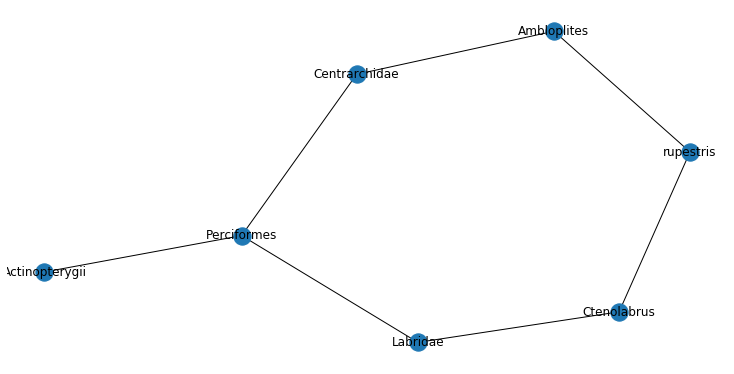

In [108]:
from networkx.drawing.layout import planar_layout

al_mac_spec = nx.Graph(d1)
plt.figure(figsize = (10,5))
nx.draw(al_mac_spec, with_labels=True)
plt.savefig('fig.png')
plt.show()


CLASS: *Actinopterygii*

TAX_ORDER: *Perciformes*

Ramificazione in due FAMIGLIE: *Centrarchidae* e *Labridae*

dalla FAMIGLIA *Centrarchidae* si passa al GENERE: *Ambloplites*

dalla FAMIGLIA *Labridae* si passa al GENERE: *Ctenolabrus*

Ricongiunzione nella specie *rupestris*

# Genus+species